# COGS 108 - Final Project 

# "Yelp rating, or health rating?"

# Overview

Compared the health inspection violation ratio of both high yelp rating restaurants and low yelp rating restaurant. The reault is that lower rating restaurants tend to have a larger ratio to violate the inspection.

# Name & PID

- Name: Shuaiqing Zhou
- PID: A15577403

# Research Question

*Are restaurants with yelp rating below the average more likely to violate the inspection?*

## Background and Prior Work

*Acoording to  Theresa Navarra, a restaurant health inspection is an examination of potentially dangerous or unsafe factors in restaurants, employees and food. This can be done during storage, production, processing and even packaging. The health inspector will pay attention to how restaurants store, defrost and cook food. He or she will also pay attention to the cleanliness of your kitchen, storage area and freezer. This inspection forcus more on the health level of the restaurant instead of the taste.

And Yelp according to wikipedia is a local business review site. It has most of the businesses for individual locations including restaurants, schools, shopping malls, etc. And Yelp users can submit reviews based on the products and services using a one to five star rating system. Thus Yelp ratings are more depending on the subjective experience, like taste, of the restaurants.

However if a restaurant uses unsafe products that leads to a physical discomfort of the customer, the restaurant is very likely to receive a low rating. Thus, I was wondering if the restaurants with relatively lower ratings are more likely to violate the health inspection.* 

References (include links):
- 1) Theresa Navarra, "How to Ace a Restaurant Health Inspection", https://www.lightspeedhq.com/blog/restaurant-health-inspection/#:~:text=A%20restaurant%20health%20inspection%20is%20an%20examination%20of%20your%20restaurant,store%2C%20thaw%20and%20cook%20food.
- 2) Yelp, https://en.wikipedia.org/wiki/Yelp#:~:text=Yelp's%20website%2C%20Yelp.com%2C,to%20five%20star%20rating%20system.

# Hypothesis


*Restaurants with Yelp ratings lower than the avergae are more likely to violate the inspection.*

# Dataset(s)

Dataset Name: yelp
  - Number of observations:3688
  - This dataset has the restaurants and their yelp ratings thst I need.
  
Dataset Name:Violations
- Number of observations:189802
- This is all the restaurants that violate the inspection.

Dataset Name: Restaurants
- Number of observations:3324
- This datasets has all the restaurants include their ind and adress, etc.


# Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
restaurant = pd.read_csv('restaurants.csv')
yelp = pd.read_csv('yelp.csv')
violation = pd.read_csv('violations.csv')

# Data Cleaning

I dropped all of the null cells, and I removed columns that I don't need

In [3]:
restaurant = restaurant[['X.objectid', 'hsisid', 'name','address1']]
yelp = yelp[['id', 'name', 'rating', 'address1']]
violation = violation[['X.objectid', 'hsisid']]

In [4]:
restaurant.dropna()
yelp.dropna()
violation.dropna()

,X.objectid,hsisid
0,2149,4092015279
1,2150,4092014572
2,2151,4092015906
3,2152,4092013840
4,2153,4092021788
...,...,...
189797,2144,4092015549
189798,2145,4092016135
189799,2146,4092020997
189800,2147,4092021798


# Data Analysis & Results

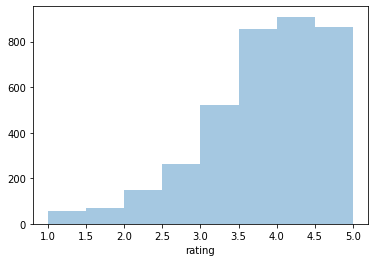

In [5]:
#make a graph of the ratings to see the distribution
sns.distplot(yelp['rating'], bins = 8, kde = False)

f1 = plt.gcf()

In [6]:
#Calculate the mean value of the yelp ratings
rating_mean = yelp['rating'].mean()
#filter out restaurants with rating below the avg
low_rating = yelp[yelp['rating'] < rating_mean]

In [7]:
#merge the restaurant and violation table to get a new dataframe of the restaurant names, ids, adresses for restaurants that violated the inspection
restaurant_violation = pd.merge(restaurant, violation, on = 'hsisid')
restaurant_violation

,X.objectid_x,hsisid,name,address1,X.objectid_y
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,6992
1,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,7791
2,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,7801
3,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,10429
4,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,15176
...,...,...,...,...,...
156911,2999,4092017227,QUICKLY,4141 DAVIS DR,185667
156912,3000,4092017274,HARRIS TEETER #43 STARBUCKS,3638 ROGERS RD,64092
156913,3000,4092017274,HARRIS TEETER #43 STARBUCKS,3638 ROGERS RD,73968
156914,3000,4092017274,HARRIS TEETER #43 STARBUCKS,3638 ROGERS RD,83806


In [8]:
#merge the yelp and the new table to get the restaurant with yelp rating that violated the inspection
yelp_violation = pd.merge(yelp, restaurant_violation, on = 'address1')
yelp_violation

,id,name_x,rating,address1,X.objectid_x,hsisid,name_y,X.objectid_y
0,southern-womens-show-raleigh,southern women's show,4.0,1025 Blue Ridge Rd,4,4092014036,Murphy House Restaurant-Dorton Arena,2846
1,southern-womens-show-raleigh,southern women's show,4.0,1025 Blue Ridge Rd,4,4092014036,Murphy House Restaurant-Dorton Arena,3111
2,southern-womens-show-raleigh,southern women's show,4.0,1025 Blue Ridge Rd,4,4092014036,Murphy House Restaurant-Dorton Arena,16423
3,southern-womens-show-raleigh,southern women's show,4.0,1025 Blue Ridge Rd,4,4092014036,Murphy House Restaurant-Dorton Arena,16642
4,southern-womens-show-raleigh,southern women's show,4.0,1025 Blue Ridge Rd,4,4092014036,Murphy House Restaurant-Dorton Arena,21471
...,...,...,...,...,...,...,...,...
5874,springhill-suites-raleigh-cary-cary,springhill suites raleigh cary,4.0,1128 Ledsome Lane,1993,4092016715,Spring Hill Suites Kitchen,92254
5875,springhill-suites-raleigh-cary-cary,springhill suites raleigh cary,4.0,1128 Ledsome Lane,1993,4092016715,Spring Hill Suites Kitchen,95385
5876,springhill-suites-raleigh-cary-cary,springhill suites raleigh cary,4.0,1128 Ledsome Lane,1993,4092016715,Spring Hill Suites Kitchen,101615
5877,springhill-suites-raleigh-cary-cary,springhill suites raleigh cary,4.0,1128 Ledsome Lane,1993,4092016715,Spring Hill Suites Kitchen,143732


In [9]:
#clean up the dataset a little bit
yelp_violation = yelp_violation[['address1', 'rating','hsisid']]
#only keep one violation record for each restaurant, because I'm not compareing the total iolation times
yelp_violation = yelp_violation.drop_duplicates()
yelp_violation

,address1,rating,hsisid
0,1025 Blue Ridge Rd,4.0,4092014036
184,2512 Ten Ten Rd,4.0,4092012231
225,9585 Chapel Hill Rd,3.0,4092014604
324,845 US Hwy 70 W,3.0,4092014002
410,220 Nottingham Dr,2.5,4092012067
...,...,...,...
5527,1911 Sego Ct,5.0,4092013322
5601,1911 Sego Ct,3.5,4092013322
5675,2421 Spring Forest Rd,4.5,4092010302
5743,4805 Capital Blvd,3.0,4092011235


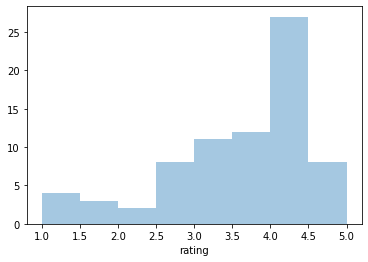

In [10]:
#make a graph of the violated restaurants' rating to see the distribution
sns.distplot(yelp_violation['rating'], bins = 8, kde = False)

f1 = plt.gcf()

In [13]:
#calculate each portion of high ratings and low ratings restaurants violated the inspection
high_rating_portion = len(yelp_violation[yelp_violation['rating']>rating_mean])/len(yelp[yelp['rating']>rating_mean])*100
low_rating_portion = len(yelp_violation[yelp_violation['rating']<rating_mean])/len(yelp[yelp['rating']<rating_mean])*100

In [14]:
high_rating_portion<low_rating_portion

True

###### Result:Restaurants with relatively low ratings is likely to violate the health inspection.

# Ethics & Privacy

First of all, these dataset are provided by the professor, and I'm not very clear with its source. Also, I don't really know whether there is a permission to use these datas. There are phone numbers included in the datasets, which is private informations. The yelp review is rated by individuals and they are not 100% neutral, especially for those restaurant who has only one or two reviews, it's possible to be biased. 

For any data I use, I should check it's source, that it should be from a reliable and legal source. And I need to make sure that I am allowed to use it. After got the permission of using the data, I need to remove everthing that's private information and never publish private information to the public. I can't control with the yelp ratings, but I will try to find more restaurants with similar number of reviews.

# Conclusion & Discussion

*First of all, the topic of my project is the relationship between yelp rating and health inspections of a restaurant. I hypothesize that restaurants with yelp rating below the mean rating would be more likely to violate the health inspection. In other words, lower yelp ratings implies the restaurants might have lower health levl. I did this by comparing the violation rate for both lower rating restaurants and higher rating restaurants, and I got the result of a higher violation rate on lower rating restaurants. Thus I came to the conclusion that restaurants with lower ratings do have a higher chance to violate the health inspection.

However, there are some limitations that might cause an inaccuracy of this test. There are some prolems with the dataset. First, the X.objectid and the hsisid sometimes does not match. Some restaurants have the same hsisid but different X.objectid and vice versa. Also, some restaurants got the same address but different names. This is confusing during the data analysis. I don't know which one to take. And some restaurants have hundreds of ratings and some only have one or two reviews, this is not very fair to take in count. And according to some news, that some of the Yelp ratings are fake, but I am unable to know whether there are any fake ratings in the dataset.

By doing this project, I want people to focus more on the health level of the restaurant, not only the taste of the food. And do not rely too much on yelp ratings. And before go to a restaurant, cosider the health and safeness of the food, because there are really lots of restaurants that violated the inspection no matter how they are rated on Yelp.*